In [0]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (11.0, 4.0)

import torch

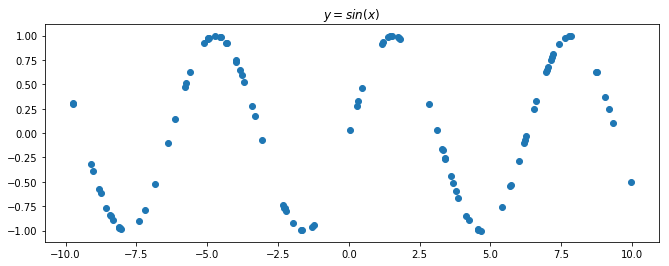

In [0]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = x_train.sin()

plt.scatter(x_train.numpy(), y_train.numpy())
plt.title('$y = sin(x)$');

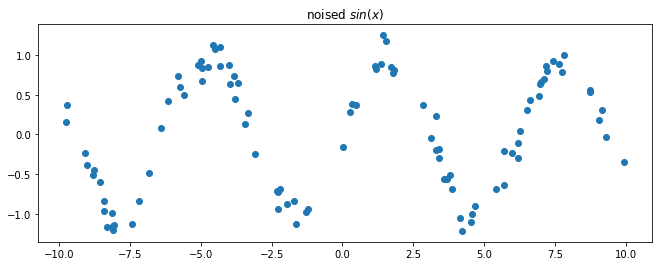

In [0]:
#гауссовский шум
noise = torch.randn(y_train.shape) / 7.
y_train = y_train + noise

plt.scatter(x_train.numpy(), y_train)
plt.title('noised $sin(x)$');

Text(0.5, 1.0, 'validation $sin(x)$')

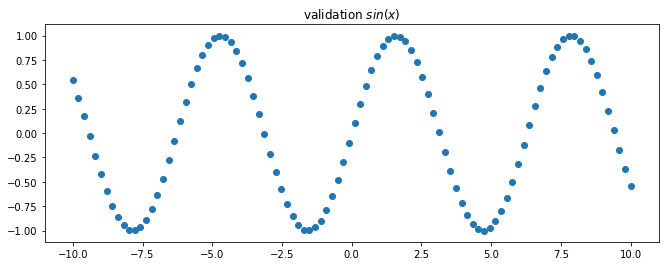

In [0]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = x_validation.sin()
plt.scatter(x_validation, y_validation)
plt.title('validation $sin(x)$')

In [0]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
  
  def predict(self, x):
    return self.forward(x)
  
  def loss(self, y_pred, y_true):
    return ((y_pred - y_true)**2).mean()
  
  def train(self, x, y, n_epochs=2000):
    optimizer = torch.optim.Adam(self.parameters(), lr=0.01)
    
    for _ in range(n_epochs):
      optimizer.zero_grad()
      
      loss_val = self.loss(self.predict(x), y)
      loss_val.backward()
      optimizer.step()
      
    return self

In [0]:
sine_net = SineNet(20)
sine_net.train(x_train.unsqueeze_(1), y_train.unsqueeze_(1))
y_pred = sine_net.predict(x_validation.unsqueeze_(1))

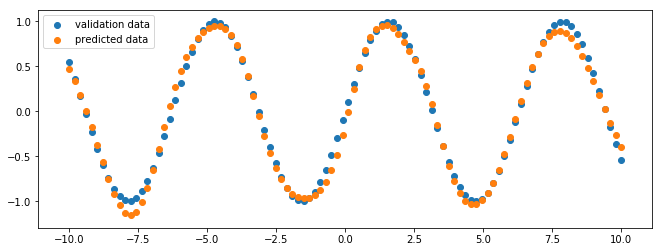

In [0]:
plt.scatter(x_validation.numpy(), y_validation.numpy(), label='validation data')
plt.scatter(x_validation.numpy(), y_pred.data.numpy(), label='predicted data')
plt.legend();


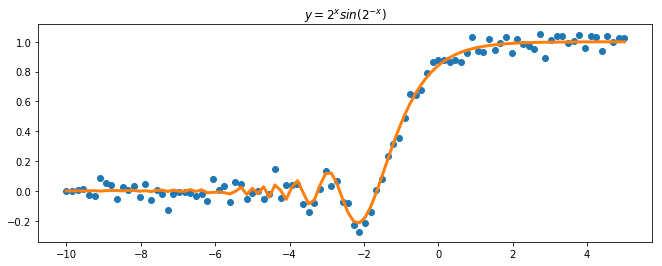

In [0]:
#что-то посложнее

def target_function(x):
    return 2**x * torch.sin(2**-x)

#данные
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

plt.plot(x_train.numpy(), y_train.numpy(), 'o');
plt.plot(x_train.numpy(), y_validation.numpy(), lw=3)
plt.title('$y = 2^x sin(2^{-x})$');


In [0]:
class RegressionNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(RegressionNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
    
  def MSE_loss(self, y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

     
  def predict(self, x):
    return self.forward(x)
    
  def train(self, x, y, n_epochs=2000, lr=0.01):
    optimizer = torch.optim.Adam(self.parameters(), lr=lr)
      
    for _ in range(n_epochs):
      optimizer.zero_grad()
        
      pred_val = self.predict(x)
      loss_val = self.MSE_loss(pred_val, y)
      loss_val.backward()
      optimizer.step()
        
    return self
 
        

In [0]:
 def MAE(y_pred, y_true):
    return (y_pred - y_true).abs().mean()


In [0]:
regression_net = RegressionNet(30)
regression_net.train(x_train, y_train, lr=.1)
y_pred = regression_net.predict(x_validation)
MAE(y_pred, y_validation)

tensor(0.0152, grad_fn=<MeanBackward0>)

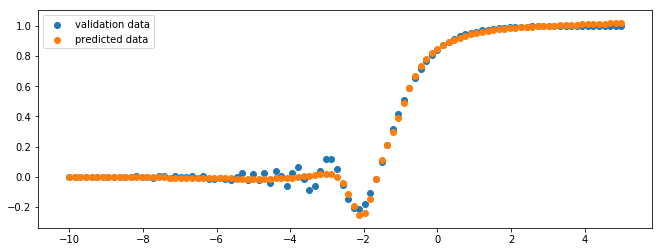

In [0]:
plt.scatter(x_validation.numpy(), y_validation.numpy(), label='validation data')
plt.scatter(x_validation.numpy(), y_pred.data.numpy(), label='predicted data')
plt.legend();